In [ ]:
# Just run the commands below if you are using colab. Otherwise, don't run.

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
os.chdir('drive/MyDrive/mestrado/pipeline/scripts')

Mounted at /content/drive


In [ ]:
def package_installed(package):
  try:
    import package
    print(f"{package} installed")
  except:
    os.system("pip install "+ package)

package_installed("upsetplot")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from upsetplot import UpSet
import regex as re
import os
import matplotlib as mpl

In [ ]:
# https://matplotlib.org/stable/api/matplotlib_configuration_api.html

font = {'family' : 'arial',
        'size'   : 14}

mpl.rc('font', **font)

https://upsetplot.readthedocs.io/en/latest/api.html?highlight=upset#upsetplot.UpSet

https://upsetplot.readthedocs.io/en/latest/auto_examples/plot_highlight.html

In [ ]:
POSITIONS = ['P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
SETS_INTERSECTIONS = dict()

In [ ]:
PATH_UPSET = os.path.join("..", "figures-tables", "upset")
isExist = os.path.exists(PATH_UPSET)
if not isExist:
# Create a new directory because it does not exist
    os.makedirs(PATH_UPSET)
    print("The new directory is created!")

In [ ]:
def identical_position(df):
    nonamers_1 = df['Nonamer_1'].str[1:8]
    nonamers_2 = df['Nonamer_2'].str[1:8]
    list_positions = ['P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'] * nonamers_1.shape[0]
    residue_identical_position = {
        'P8':[], 'P7':[], 'P6':[], 'P5':[], 'P4':[], 'P3':[],'P2':[]
    }
    for nonamers_1, nonamers_2 in zip(nonamers_1, nonamers_2):
        for aa_1, aa_2, position in zip(nonamers_1, nonamers_2, list_positions):
            if aa_1 == aa_2:
                residue_identical_position[position].append(True)
            else:
                residue_identical_position[position].append(False)

    residue_identical_position = pd.DataFrame(residue_identical_position)

    return residue_identical_position

In [ ]:
def styles_subsets(df):
    global styles
    color1 = "#b51963"
    color2 = "#f57600"
    color3 = "#054fb9"

    style_rule_1 = [(['P2', 'P3', 'P5', 'P8'], color1, "Rule 1")]
    style_rule_2 = [(['P2', 'P3', 'P4', 'P5'], color2, "Rule 2"),
                    (['P2', 'P3', 'P5', 'P6'], color2, "Rule 2"),
                    (['P2', 'P3', 'P5', 'P7'], color2, "Rule 2"),
                    (['P2', 'P4', 'P5', 'P8'], color2, "Rule 2"),
                    (['P2', 'P5', 'P6', 'P8'], color2, "Rule 2"),
                    (['P2', 'P5', 'P7', 'P8'], color2, "Rule 2"),
                    (['P3', 'P4', 'P5', 'P8'], color2, "Rule 2"),
                    (['P3', 'P5', 'P6', 'P8'], color2, "Rule 2"),
                    (['P3', 'P5', 'P7', 'P8'], color2, "Rule 2")]
    style_rule_3 = [(['P2','P4', 'P5', 'P6', 'P7'], color3, "Rule 3"),
                    (['P3','P4', 'P5', 'P6', 'P7'], color3, "Rule 3"),
                    (['P4', 'P5', 'P6', 'P7', 'P8'], color3, "Rule 3")]

    styles = []
    if "Rule 3" in df["Selection Rule"].unique():
        styles.extend(style_rule_3)
    if "Rule 2" in df["Selection Rule"].unique():
        styles.extend(style_rule_2)
    if "Rule 1" in df["Selection Rule"].unique():
        styles.extend(style_rule_1)

    return styles

## upset_plot

In [ ]:
def upset_plot(df, protein, letter):

    upset = UpSet(df, subset_size='count', element_size=28, orientation='horizontal',
                  show_counts=False, sort_categories_by=None)

    styles = styles_subsets(df)
    for present, color, label in styles:
        upset.style_subsets(present=present, facecolor=color, label=label, edgecolor=EDGECOLOR, linewidth=LINEWIDTH)

    SETS_INTERSECTIONS[protein] = upset.intersections.values

    with plt.rc_context(PARAMS):
        upset.plot()

    plt.title(letter, pad=20, weight='bold', loc="left", x=X)
    plt.title(f"UpSet - {protein}", pad=20, loc="center")

    path = os.path.join(PATH_UPSET, f'{protein}.jpg')

    plt.savefig(path, dpi=500, bbox_inches='tight')
    plt.show()

In [ ]:
def main(PATH):
    df = pd.read_excel(PATH)

    residue_identical_position = identical_position(df)
    df = pd.concat([df, residue_identical_position], axis=1)
    df.set_index(POSITIONS, inplace=True)

    return df

# Analysis

In [ ]:
IdentityAnalysisPath = os.path.join("..", "results", "IdentityAnalysis")
IdentityAnalysisPath

'..\\results\\IdentityAnalysis'

In [ ]:
EDGECOLOR = 'black'
ALPHA = 0.7
LINEWIDTH = 0.5

# https://matplotlib.org/stable/tutorials/introductory/customizing.html
PARAMS = {'legend.fontsize': 16, 'legend.handlelength':0.8,
            "legend.loc":"best", "grid.color":"white",
            "legend.framealpha":0, "legend.labelcolor":"White", "legend.facecolor":"white", "legend.frameon":False,
            }

MBP

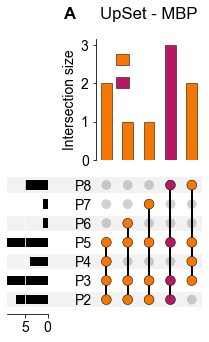

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 6 MBP.xlsx")
MBP = main(PATH)
X = -0.3

upset_plot(MBP, 'MBP', "A")

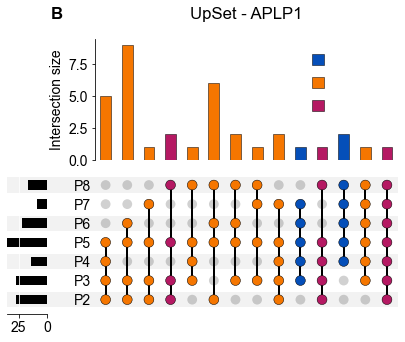

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 2 APLP1.xlsx")
APLP1 = main(PATH)
X = -0.145

upset_plot(APLP1, 'APLP1', "B")

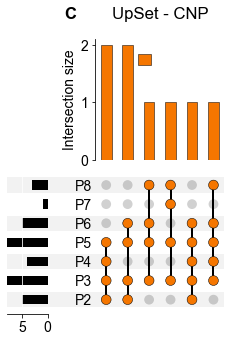

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 3 CNP.xlsx")
CNP = main(PATH)
X = -0.246

upset_plot(CNP, 'CNP', "C")

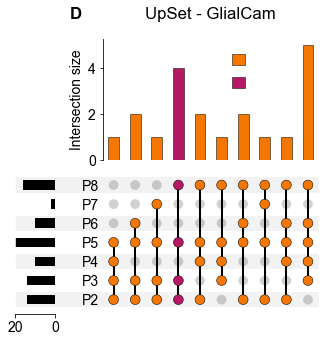

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 4 GlialCam.xlsx")
GlialCam = main(PATH)
X = -0.151

upset_plot(GlialCam, 'GlialCam', "D")

MAG

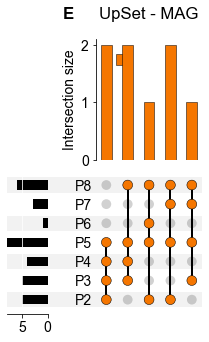

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 5 MAG.xlsx")
MAG = main(PATH)
X = -0.31

upset_plot(MAG, 'MAG', "E")

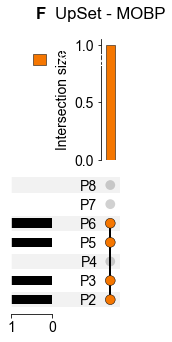

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 7 MOBP.xlsx")
MOBP = main(PATH)
X = -3.5

upset_plot(MOBP, 'MOBP', "F")

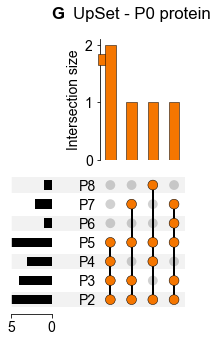

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 8 P0 protein.xlsx")
P0_protein = main(PATH)
X = -0.57

upset_plot(P0_protein, 'P0 protein', "G")

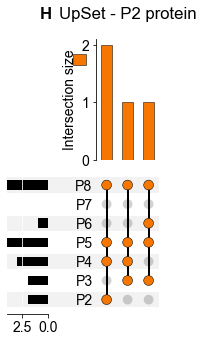

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 9 P2 protein.xlsx")
P2_protein = main(PATH)
X = -0.9

upset_plot(P2_protein, 'P2 protein', "H")

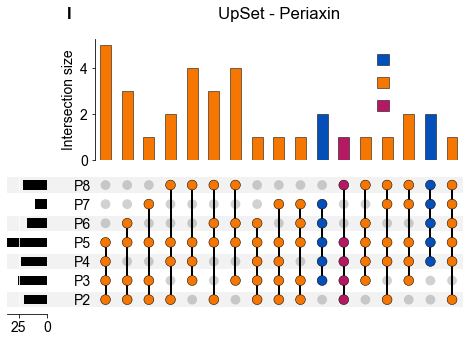

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 10 Periaxin.xlsx")
Periaxin = main(PATH)
X = -0.075

upset_plot(Periaxin, 'Periaxin', "I")

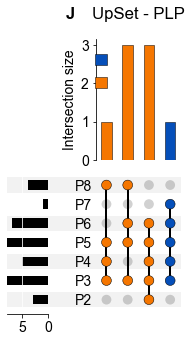

In [ ]:
PATH = os.path.join(IdentityAnalysisPath, "supplementary table - 11 PLP.xlsx")
PLP = main(PATH)
X = -0.36

upset_plot(PLP, 'PLP', "J")